In [1]:
import numpy as np
import jax.numpy as jnp
import jax.random as jrandom

import sys


HOME = "/rds/general/user/dl2119/home/ICLR_Interp" # Path(os.environ["PATH_INTP_FOLDER"])
sys.path.append(HOME)
sys.path.append(HOME + "/DataGeneration/CurvSampling")
from CurvSampling import sample_curv
from UniformData import get_uniform_random

from chart_studio import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from Functions import get_func
from DataAnalysis import curv

import os

import time

from jax.config import config
config.update("jax_enable_x64", True)

%load_ext autoreload
%autoreload 2

In [303]:
num_steps = 100
sig = 1e-1
seed = 0
eps_barrier = 5
func_name = "Ackley"
dim = 2
N = 10000
curv_scaling = 1e-3
# #     "Schwefel": {
#         "num_steps": 50,
#         "sig": 0.5,
#         "eta": 1,
#         "seed": 0,
#         "eps_barrier": 5,
#         "curv_scaling": 100
#     },

F = get_func(func_name)

a = time.time()
path = sample_curv(F, dim, N, num_steps, sig, seed, eps_barrier, curv_scaling=curv_scaling, full_path=True)

last_elem = path[-1]
path = jnp.array(path)
time.time() - a

1.966904878616333

(array([1.370e+02, 2.550e+02, 2.060e+02, 4.020e+02, 2.480e+02, 1.880e+02,
        2.720e+02, 3.890e+02, 2.870e+02, 3.520e+02, 3.570e+02, 1.800e+02,
        8.200e+01, 5.300e+01, 4.000e+01, 5.700e+01, 4.600e+01, 5.500e+01,
        5.900e+01, 9.800e+01, 1.960e+02, 3.940e+02, 7.700e+02, 1.386e+03,
        2.282e+03, 1.098e+03, 7.900e+01, 3.100e+01, 0.000e+00, 1.000e+00]),
 array([10.2716819 , 12.66037228, 15.04906267, 17.43775306, 19.82644344,
        22.21513383, 24.60382421, 26.9925146 , 29.38120498, 31.76989537,
        34.15858575, 36.54727614, 38.93596653, 41.32465691, 43.7133473 ,
        46.10203768, 48.49072807, 50.87941845, 53.26810884, 55.65679923,
        58.04548961, 60.43418   , 62.82287038, 65.21156077, 67.60025115,
        69.98894154, 72.37763192, 74.76632231, 77.1550127 , 79.54370308,
        81.93239347]),
 <BarContainer object of 30 artists>)

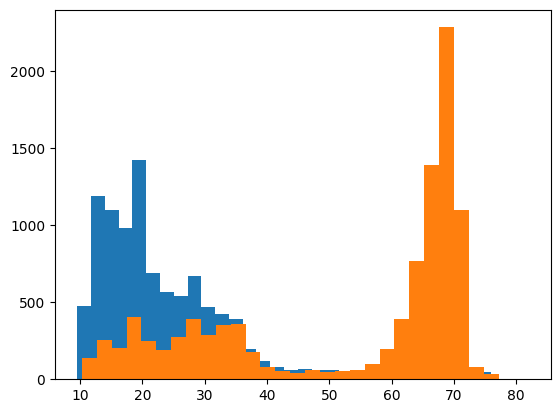

In [304]:
X_data = get_uniform_random(F, N, dim, seed)

plt.hist(np.array(curv(F, X_data)), bins=30)



plt.hist(np.array(curv(F, last_elem)), bins=30)



# plt.xlim(0, 1)

(array([ 48.,  10.,  17.,  47.,   2.,   2.,  55., 101.,  20.,  62.,  22.,
         29.,   0.,   0.,  55.,   8.,  74., 123.,  50.,  25.,   0.,   0.,
        112.,  27.,  25.,   0.,   0.,   0.,  60.,  26.]),
 array([3.67485616e-18, 7.78546482e-01, 1.55709296e+00, 2.33563945e+00,
        3.11418593e+00, 3.89273241e+00, 4.67127889e+00, 5.44982537e+00,
        6.22837186e+00, 7.00691834e+00, 7.78546482e+00, 8.56401130e+00,
        9.34255778e+00, 1.01211043e+01, 1.08996507e+01, 1.16781972e+01,
        1.24567437e+01, 1.32352902e+01, 1.40138367e+01, 1.47923832e+01,
        1.55709296e+01, 1.63494761e+01, 1.71280226e+01, 1.79065691e+01,
        1.86851156e+01, 1.94636621e+01, 2.02422085e+01, 2.10207550e+01,
        2.17993015e+01, 2.25778480e+01, 2.33563945e+01]),
 <BarContainer object of 30 artists>)

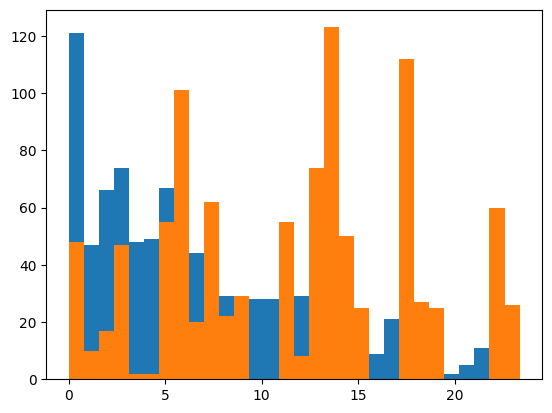

In [253]:
X_data = get_uniform_random(F, N, dim, seed)

plt.hist(np.array(curv(F, X_data)), bins=30)



plt.hist(np.array(curv(F, last_elem)), bins=30)



# plt.xlim(0, 1)

In [256]:
F.bounds

DeviceArray([[-32.768,  32.768]], dtype=float64)

(array([2046., 2011., 1968., 1939., 1945., 2035., 1954., 2030., 2074.,
        1998.]),
 array([-3.27872770e+01, -2.62291968e+01, -1.96711166e+01, -1.31130364e+01,
        -6.55495618e+00,  3.12401665e-03,  6.56120422e+00,  1.31192844e+01,
         1.96773646e+01,  2.62354448e+01,  3.27935250e+01]),
 <BarContainer object of 10 artists>)

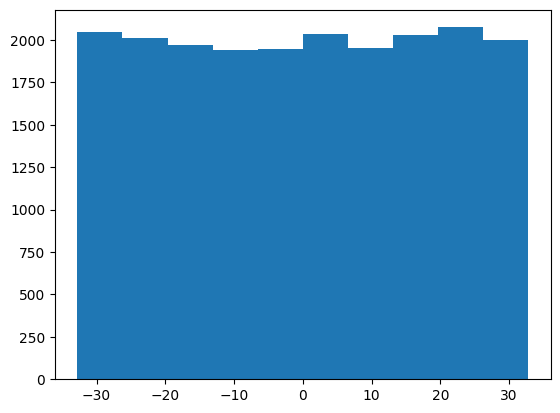

In [280]:
plt.hist(np.array(last_elem).flatten())

(array([131., 327., 371., 353., 355., 388., 358., 324., 362., 362., 320.,
        336., 370., 346., 339., 354., 354., 357., 347., 341., 340., 350.,
        324., 356., 315., 345., 342., 339., 382., 112.]),
 array([-5.33161714, -4.80992622, -4.28823529, -3.76654437, -3.24485345,
        -2.72316253, -2.2014716 , -1.67978068, -1.15808976, -0.63639884,
        -0.11470791,  0.40698301,  0.92867393,  1.45036485,  1.97205578,
         2.4937467 ,  3.01543762,  3.53712854,  4.05881947,  4.58051039,
         5.10220131,  5.62389224,  6.14558316,  6.66727408,  7.188965  ,
         7.71065593,  8.23234685,  8.75403777,  9.27572869,  9.79741962,
        10.31911054]),
 <BarContainer object of 30 artists>)

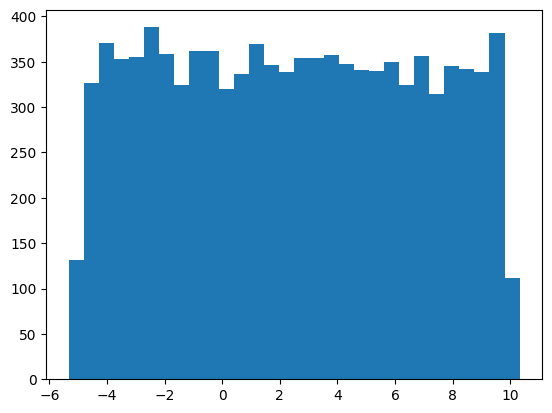

In [183]:
plt.hist(np.array(path[1][:, 0]), bins=30)

In [4]:
def get_line_along_v(F, v, N):
    """Goes through the center of the cube"""
    v = v / jnp.linalg.norm(v)
    c = jnp.mean(F.bounds, axis=1)
    # when does t*v + c cross boundary. 
    # bounds[:, 0] \leq c + t v \leq bounds[:, 1]
    # ts_low \leq t \leq ts_high. with ts_low \leq 0 and ts_high \geq 0. 
    # hence, of all negatives we need the largetst and all positives the smallest. 
    # because c is the center, we have t_low = -t_high
    
    t0s =  (F.bounds[:, 0] - c)/v
    t1s =  (F.bounds[:, 1] - c)/v
    t_idx = jnp.argmin(jnp.abs(t0s))
    
    t0 = t0s[t_idx]
    t1 = t1s[t_idx]
    
    print(t1)
    
    xs = (c + t0 * v) + jnp.linspace(0, 1, N).reshape(-1, 1) * (c + t1 * v - (c + t0 * v))
    return xs
    

In [72]:
F.f2(xs_v)

DeviceArray([[[nan, nan],
              [nan, nan]],

             [[nan, nan],
              [nan, nan]],

             [[nan, nan],
              [nan, nan]],

             ...,

             [[nan, nan],
              [nan, nan]],

             [[nan, nan],
              [nan, nan]],

             [[nan, nan],
              [nan, nan]]], dtype=float64)

In [8]:
def f(X):
    c = 418.9829
    d = X.shape[0]
    return c * d - jnp.sum(jnp.sin(jnp.sqrt(jnp.abs(X))) * X)

In [77]:
from jax import grad

2.3298674684623473


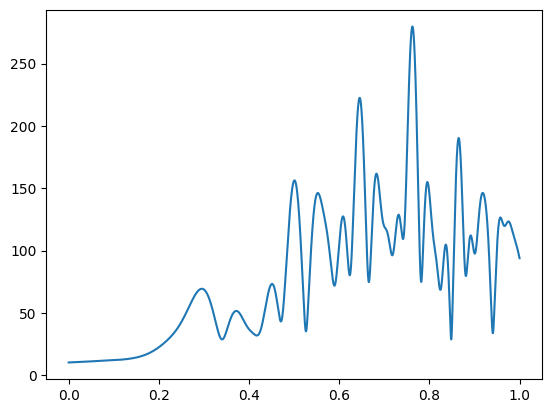

In [63]:
dim = 6
xs_v = get_line_along_v(F, jnp.array(range(dim)), N)
plt.plot(jnp.linspace(0, 1, N), curv(F, xs_v))

In [89]:
def f(X):
    c = 418.9829
    d = X.shape[1]
    return c * d - jnp.sum(jnp.sin(jnp.sqrt(jnp.abs(X))) * X, axis=1)
#     return c * d - jnp.sum(jnp.sin(jnp.power(X**2, 1/4.)) * X, axis=1)

In [60]:

xs_v = get_line_along_v(F, jnp.array(range(1, dim + 1)), N)
plt.plot(jnp.linspace(0, 1, N), F.f(xs_v))
# plt.plot(jnp.linspace(0, 1, N), f(xs_v))
# plt.xlim(0.45, 0.55)
# plt.plot(jnp.linspace(0, 1, N), -curv(F, xs_v)*0.01)

2.4974069892856585


ValueError: Non-hashable static arguments are not supported. An error occurred during a call to 'curv' while trying to hash an object of type <class 'jaxlib.xla_extension.DeviceArray'>, [[1.30899694e+00 1.04719755e+00 7.85398163e-01 5.23598776e-01
  2.61799388e-01 0.00000000e+00]
 [1.30900218e+00 1.04720802e+00 7.85413872e-01 5.23619720e-01
  2.61825568e-01 3.14162407e-05]
 [1.30900741e+00 1.04721850e+00 7.85429580e-01 5.23640664e-01
  2.61851748e-01 6.28324814e-05]
 ...
 [1.83258524e+00 2.09437416e+00 2.35616307e+00 2.61795199e+00
  2.87974091e+00 3.14152982e+00]
 [1.83259048e+00 2.09438463e+00 2.35617878e+00 2.61797293e+00
  2.87976709e+00 3.14156124e+00]
 [1.83259571e+00 2.09439510e+00 2.35619449e+00 2.61799388e+00
  2.87979327e+00 3.14159265e+00]]. The error was:
TypeError: unhashable type: 'DeviceArray'


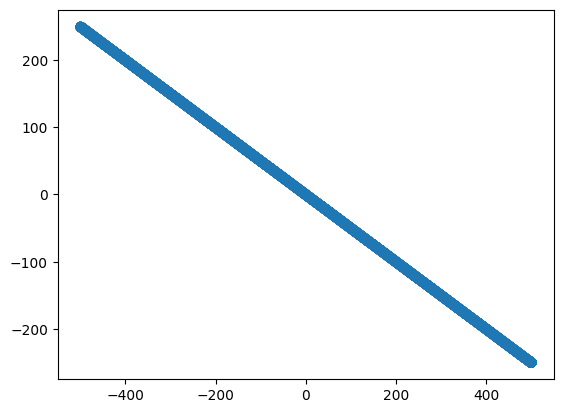

In [38]:
xs_v = get_line_along_v(F, jnp.array([1, -.5]), N)
plt.scatter(xs_v[:, 0], xs_v[:, 1])

(array([5.060e+02, 1.317e+03, 1.700e+02, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.01367637, 0.25004077, 0.48640518, 0.72276959, 0.95913399,
        1.1954984 , 1.43186281, 1.66822722, 1.90459162, 2.14095603,
        2.37732044, 2.61368485, 2.85004925, 3.08641366, 3.32277807,
        3.55914247, 3.79550688, 4.03187129, 4.2682357 , 4.5046001 ,
        4.74096451]),
 <BarContainer object of 20 artists>)

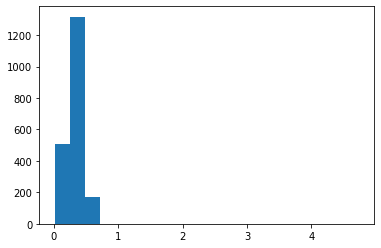

In [62]:
plt.hist(np.array(curv(F, X)), bins=20)

(array([ 43.,  93., 133., 223., 378., 322., 299., 316., 156.,  20.,  11.,
          3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.01470452, 0.0726    , 0.13049548, 0.18839097, 0.24628645,
        0.30418194, 0.36207742, 0.4199729 , 0.47786839, 0.53576387,
        0.59365935, 0.65155484, 0.70945032, 0.76734581, 0.82524129,
        0.88313677, 0.94103226, 0.99892774, 1.05682323, 1.11471871,
        1.17261419]),
 <BarContainer object of 20 artists>)

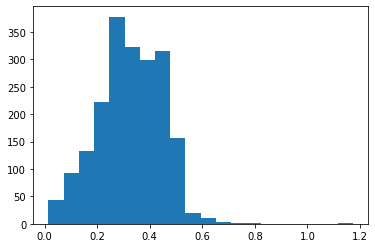

In [14]:
plt.hist(np.array(curv(F, path[-1])), bins=20)

In [31]:
a = time.time()
F.f1(X)
print(time.time() - a)

0.000986337661743164


In [36]:
a = time.time()
F.f2(X)
print(time.time() - a)

0.001432180404663086


In [ ]:
N = 250

x = np.linspace(F.bounds[0][0], F.bounds[0][1], int(N))
y = np.linspace(F.bounds[0][0], F.bounds[0][1], int(N))
XY = np.meshgrid(x, y)

#define 2D points, as input data for the Delaunay triangulation of U
points2D=np.vstack([XY[0].ravel(), XY[1].ravel()]).T

z_quadrics_f = F.f(points2D).reshape(N, N)


axis = dict(
showbackground=True,
backgroundcolor="rgb(230, 230,230)",
gridcolor="rgb(255, 255, 255)",
zerolinecolor="rgb(255, 255, 255)",
    )

layout = go.Layout(
         title='triangulation',
         width=800,
         height=800,
         scene=dict(
         xaxis=dict(axis),
         yaxis=dict(axis),
         zaxis=dict(axis),
        aspectratio=dict(
            x=1,
            y=1,
            z=0.5
        ),
        )
        )

fig = go.Figure(data=[go.Surface(z=z_quadrics_f, x=x, y=y)], layout=layout)


fig.show()



In [ ]:
z_quadrics_f.shape